In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
#here we have to predict whether the preson is having heart disease or not.
#since the output column in in categorical form(0,1) so we will be performing classification algorithm


# performing eda:

In [5]:
#checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#no null values present


In [8]:
#checking duplicate values
df.duplicated().sum()

723

In [9]:
#there are 723 duplicate so rdeleting the dupliacte rows
df.drop_duplicates(inplace=True)

In [10]:
#checking duplicate values
df.duplicated().sum()

0

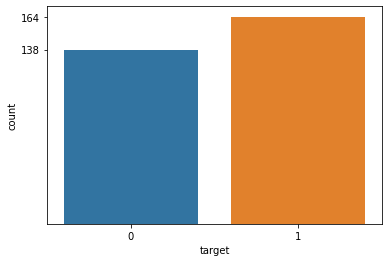

In [11]:
#chek the output is balancedor not
sb.countplot(data=df,x='target')
f=df['target'].value_counts()
plt.yticks(f)
plt.show()
#here the data is balanced

In [12]:
#select input and output
#output column is target
x=df.drop('target',axis=1)
y=df['target']

In [13]:
#split the data
from sklearn.model_selection import train_test_split
#creating objetc of train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [14]:
#applying standarad scaler on input
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [15]:
#create a function 
def create_model(model):#model uset define which hold the object of algo
    #train the model with 70%
    model.fit(x_train,y_train)
    #test the mdoel with 30 % data
    y_pred=model.predict(x_test)
    #generate report
    from sklearn.metrics import confusion_matrix,classification_report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [16]:
#perform logitic model:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [17]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        36
           1       0.88      0.82      0.85        55

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.83        91

[[30  6]
 [10 45]]


In [18]:
#here the accracy rate of having heart disease is 82 and not having heart disease is 83 which is good but not best so we will perfomr alof on this data

# perform Decision trees classifier

In [19]:
#performing decision tree classifier wiht deafult a sgini index
from sklearn.tree import DecisionTreeClassifier

In [20]:
dct=DecisionTreeClassifier()

In [21]:
dct=create_model(dct)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        36
           1       0.83      0.78      0.80        55

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.76        91
weighted avg       0.77      0.77      0.77        91

[[27  9]
 [12 43]]


In [22]:
#here we get the accuracy of having heart diseases as 76 and not having heart diseases as 72  which i sdue to overfittinng o fthe model.
#to avoid overfitting use pruning technique

In [23]:
#check important features means check information gain of each input
dct.feature_importances_

array([0.13578853, 0.02671306, 0.27619667, 0.03534042, 0.01788047,
       0.01786187, 0.01156769, 0.07686185, 0.02726991, 0.13255647,
       0.05219014, 0.0841138 , 0.10565912])

In [24]:
dict={'Input':x.columns,"IG":dct.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)#sorting the value in descending order
#disadvantage of dct is that if there is little bit og ig is there then it will take that ig into consideration

,Input,IG
0,cp,0.276197
1,age,0.135789
2,oldpeak,0.132556
3,thal,0.105659
4,ca,0.084114
5,thalach,0.076862
6,slope,0.052190
7,trestbps,0.035340
8,exang,0.027270
9,sex,0.026713


In [25]:
#using first method as max_depth:
'''for i in range(1,9):
    dct1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max depth ",i)
    dct1=create_model(dct1)'''
dct1=DecisionTreeClassifier(random_state=1,max_depth=6)
dct1=create_model(dct1)

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        36
           1       0.81      0.76      0.79        55

    accuracy                           0.75        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91

[[26 10]
 [13 42]]


In [26]:
#aftre max_depth pruning technique thencacuracy of heart dieseases is 76% nd not having heart dieseases is 72%

In [27]:
dict={'Input':x.columns,"IG":dct1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,Input,IG
0,cp,0.309856
1,thal,0.121937
2,oldpeak,0.119816
3,age,0.106206
4,ca,0.096807
5,thalach,0.064228
6,slope,0.058550
7,exang,0.030593
8,sex,0.029968
9,trestbps,0.029002


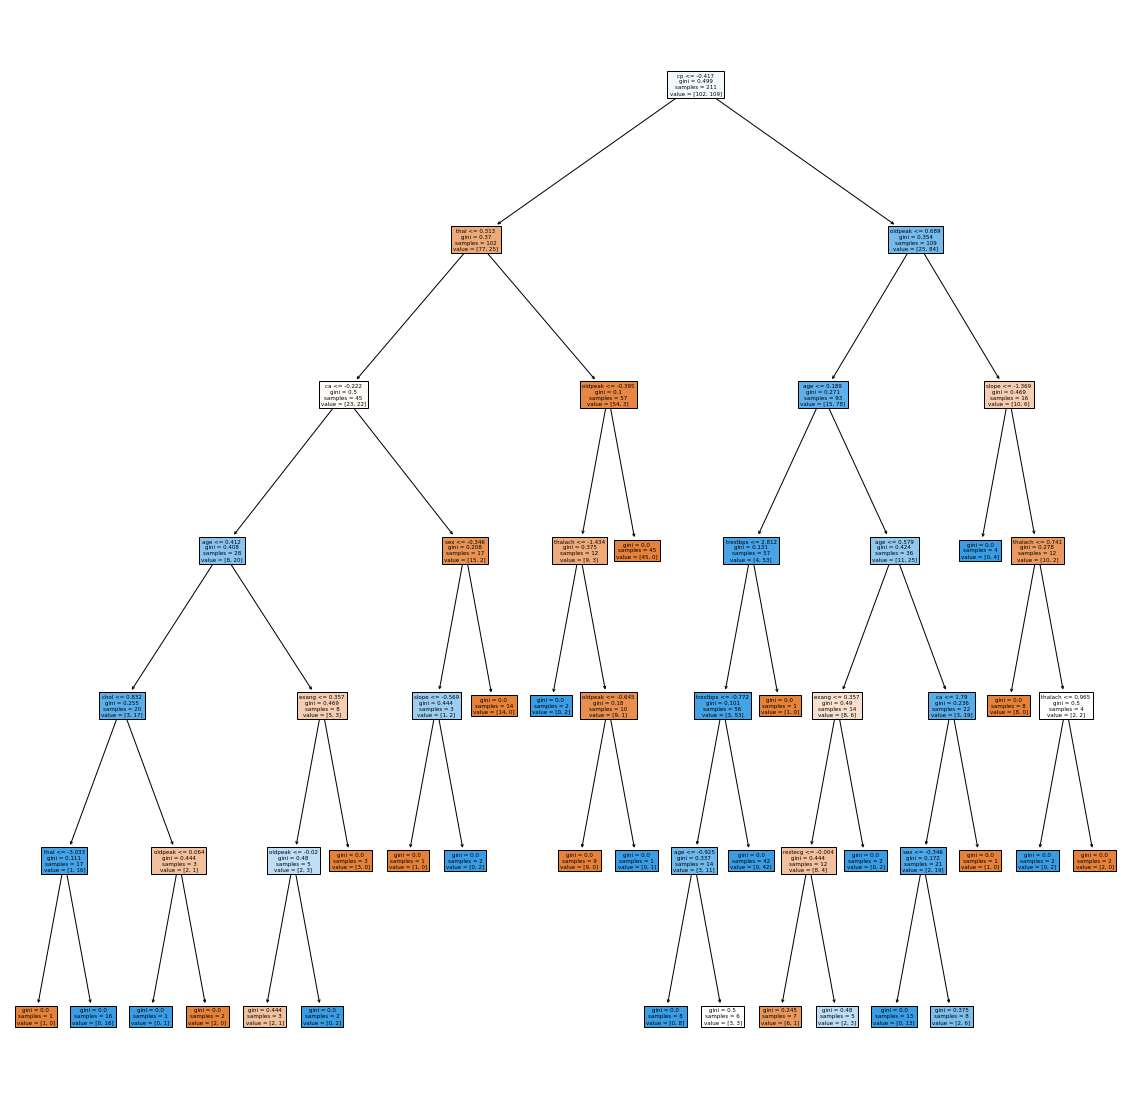

In [28]:
#create a decision tree
from sklearn import tree
features=x.columns#no of inputs
plt.figure(figsize=(20,20))
_=tree.plot_tree(dct1,feature_names=features,filled=True)#method to draw the tree

In [29]:
#second pruningtechnique of DCT
#2. min_samples_leaf : inbuilt parameter of DecisionTreeClassifier
'''for i in range(45,101):
    dct2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min samples",i)
    dct2=create_model(dct2)'''
dct2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
dct2=create_model(dct2)

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        36
           1       0.82      0.75      0.78        55

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.76      0.75      0.75        91

[[27  9]
 [14 41]]


In [30]:
#aftre min_samples_leaf  pruning technique thencacuracy of heart dieseases is 75% nd not having heart dieseases is 75%

In [31]:
#use entropy
#passing the parameter ='entropy' by default ='giniindex' if not specified 
dct=DecisionTreeClassifier(random_state=1,criterion='entropy')
#not applied pruning technique

In [32]:
dct=DecisionTreeClassifier()

In [33]:
dct=create_model(dct)

              precision    recall  f1-score   support

           0       0.66      0.69      0.68        36
           1       0.79      0.76      0.78        55

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

[[25 11]
 [13 42]]


In [34]:
#with entropy of dct the acacuracy of heart dieseases is 82% nd not having heart dieseases is 72% which maybe of overfitting of data


In [35]:
# to avoid overfitting in DCT use pruning tehcnique in entropy:
#using first method as max_depth:
'''for i in range(1,9):
    dct1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print("Max depth ",i)
    dct1=create_model(dct1)'''
dct1=DecisionTreeClassifier(random_state=1,max_depth=2)
dct1=create_model(dct1)

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        36
           1       0.82      0.75      0.78        55

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.76      0.75      0.75        91

[[27  9]
 [14 41]]


In [36]:
#here we get the accuracy of having heart diseases as 75 and not having heart diseases as 75  with thehelp of 1st pruning technique

In [37]:
#second pruningtechnique of DCT
#2. min_samples_leaf : inbuilt parameter of DecisionTreeClassifier
'''for i in range(45,101):
    dct2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
    print("min samples",i)
    dct2=create_model(dct2)'''
dct2=DecisionTreeClassifier(random_state=1,min_samples_leaf=65)
dct2=create_model(dct2)

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        36
           1       0.82      0.75      0.78        55

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.76      0.75      0.75        91

[[27  9]
 [14 41]]


In [38]:
#aftre min_samples_leaf  pruning technique thencacuracy of heart dieseases is 75% nd not having heart dieseases is 75% with entropy

In [39]:
dict={'Input':x.columns,"IG":dct2.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)#sorting the value in descending order
#disadvantage of dct is that if there is little bit og ig is there then it will take that ig into consideration

,Input,IG
0,cp,1.0
1,age,0.0
2,sex,0.0
3,trestbps,0.0
4,chol,0.0
5,fbs,0.0
6,restecg,0.0
7,thalach,0.0
8,exang,0.0
9,oldpeak,0.0


# perform Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier


In [41]:
#create a object of Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=10,max_features=5,random_state=1)
#n_estimators means take how many decision tree should be taken
#min tree=10 and max tree should be 100
'''for i in range(12,1,-1):
    rfc=RandomForestClassifier(random_state=1,n_estimators=10,max_features=i)
    print("No of features ",i)
    #call a function
    rfc=create_model(rfc)'''
rfc=create_model(rfc)
#by default it has taken gini index

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        36
           1       0.92      0.82      0.87        55

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.86      0.85      0.85        91

[[32  4]
 [10 45]]


In [42]:
#with 5 features we get the accuracy as heart dieasese is 82% and not having heart diesease as 89%

In [43]:
dict={'Input':x.columns,"IG":rfc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,Input,IG
0,thal,0.188945
1,cp,0.144433
2,thalach,0.132663
3,oldpeak,0.124095
4,chol,0.090906
5,ca,0.082437
6,age,0.081661
7,trestbps,0.064333
8,sex,0.026788
9,slope,0.023456


# performing ensemmbling technique:
#1.ada boost

In [44]:
#use boosting technique:it is ensembling technique
#1.ada boost:means adaptor boosting :its works on decision stump
from sklearn.ensemble import AdaBoostClassifier


In [45]:
#create a object
#n_estimator mean no of decsionstump and it should <=100

'''for i in range(1,14):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No of decision stump",i)
    #call function:
    ada=create_model(ada)'''

ada=AdaBoostClassifier(n_estimators=3,random_state=1)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        36
           1       0.87      0.85      0.86        55

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

[[29  7]
 [ 8 47]]


In [46]:
#here we get the accuracy of havig=ng heart diesease as 85% and not having heart diesease as 81%

# gradient bosting:
#.2 Gradient Boosting(GB) : - 

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
'''for i in range(10,101):
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No of estimator",i)
    gbc=create_model(gbc)'''
#all features and all data
gbc=GradientBoostingClassifier(n_estimators=25,random_state=1)

gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.87      0.84      0.85        55

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[29  7]
 [ 9 46]]


In [49]:
#here we get the accuracy of having heart diesease as 84% and not having heart diesease as 81%

# Extreme Gradient Boosting

In [50]:
!pip install xgboost


[notice] A new release of pip available: 22.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from xgboost import XGBClassifier 

In [52]:
xgb=XGBClassifier(n_estimators=18,random_state=1,reg_alpha=1)
#here reg_aplha=1 means yes we want ot handle overfitting and reg men regularegularisation 
#alpha and lambda is hyperparameter
xgb=create_model(xgb)
'''for i in range(10,101):
    xgb=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
    print("No of estimator",i)
    xgb=create_model(xgb)'''


              precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.87      0.84      0.85        55

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[29  7]
 [ 9 46]]


'for i in range(10,101):\n    xgb=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)\n    print("No of estimator",i)\n    xgb=create_model(xgb)'

In [53]:
#here we will be taking n_estimator a 18 bcz the accurarcy socre is having heart dieseas as 84%  and 81% not having heart diesease  which is good.


# support vector machine

In [54]:
#1. Linear Separable data means Linear Kernal
#call inbuilt class 
from sklearn.svm import LinearSVC

In [55]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1) 

In [56]:
#call function 
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        36
           1       0.89      0.87      0.88        55

    accuracy                           0.86        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

[[30  6]
 [ 7 48]]


In [57]:
#using linear svm the accurarcy socre is having heart diesease as 0-83%  and 1-87% not having heart diesease 

In [58]:
#create object of LinearSVC class and add some external error 
svc1=LinearSVC(random_state=1,C=0.001)

In [59]:
svc1=create_model(svc1)
#here the accuracy is not increasing after adding error

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        36
           1       0.88      0.91      0.89        55

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.87      0.87        91

[[29  7]
 [ 5 50]]


In [60]:
# the linear svc scopre of having herat dieseases is 91% and  not having herat diesases as 81%

# # Non-linear data
#1.polynomial kernel function

In [61]:
#SVC-support vector classifier 
from sklearn.svm import SVC


In [62]:
#create  a object and specifying whcih kernel function should be passed in parameter
svc1=SVC(random_state=1,kernel='poly')
#call function 
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.78      0.69      0.74        36
           1       0.81      0.87      0.84        55

    accuracy                           0.80        91
   macro avg       0.80      0.78      0.79        91
weighted avg       0.80      0.80      0.80        91

[[25 11]
 [ 7 48]]


In [63]:
# the poly svc score of having heartt dieseases is 87% and  not having heart diesases as 69% beacasuebthe data is non non linear

In [64]:
#creat eobjet of sc of rdail basis kernel function
svc2=SVC(random_state=1,kernel='rbf')
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        36
           1       0.88      0.78      0.83        55

    accuracy                           0.80        91
   macro avg       0.80      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91

[[30  6]
 [12 43]]


In [65]:
# the radial  svc score of having heart dieseases is 78% and  not having herat diesases as 83% because the data is not radially distributed.

In [66]:
dict={'Input':x.columns,"IG":ada.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values(by='IG',ascending=False,ignore_index=True)

,Input,IG
0,cp,0.333333
1,ca,0.333333
2,thal,0.333333
3,age,0.000000
4,sex,0.000000
5,trestbps,0.000000
6,chol,0.000000
7,fbs,0.000000
8,restecg,0.000000
9,thalach,0.000000


# K-nearest neighbor classifier:

In [67]:
#important features : input (cp,ca,thal)
#select input and ouput
x=df[['cp','ca','thal']]
y=df["target"]

In [68]:
# spliting the data of x and y using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [69]:
#first apply standardscaler
from sklearn.preprocessing import StandardScaler
#create object for StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
KNC=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5
#we can increase the n_neighbors value as  5 and 7 not 6

In [71]:
KNC=create_model(KNC)

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.87      0.84      0.85        55

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[29  7]
 [ 9 46]]


In [72]:
#after applying k neghbours classifier ,the accuracy we got as 84% having heart disease and 81% not hvaing heart diasease .

In [73]:
#CONCLUSION:In heart diseases prediction data set,support vector machine using linear data algorithm is best with having disease as 87% and not having disease as 83%.